In [21]:
import numpy as np
import imgaug as ia
from imgaug.augmentables.batches import UnnormalizedBatch
from imgaug import augmenters as iaa
import time
%matplotlib inline

BATCH_SIZE = 1
NB_BATCHES = 6

image = ia.quokka_square(size=(1024, 1024))
images = [np.copy(image) for _ in range(BATCH_SIZE)]
print(len(images))

1


In [22]:

batches = [UnnormalizedBatch(images=images) for _ in range(NB_BATCHES)]

In [23]:

aug = iaa.Sequential([
    iaa.PiecewiseAffine(scale=0.05, nb_cols=6, nb_rows=6),  # very slow
    iaa.Fliplr(0.5),  # very fast
    iaa.CropAndPad(px=(-10, 10))  # very fast
])

Augmentation done in 4.22s


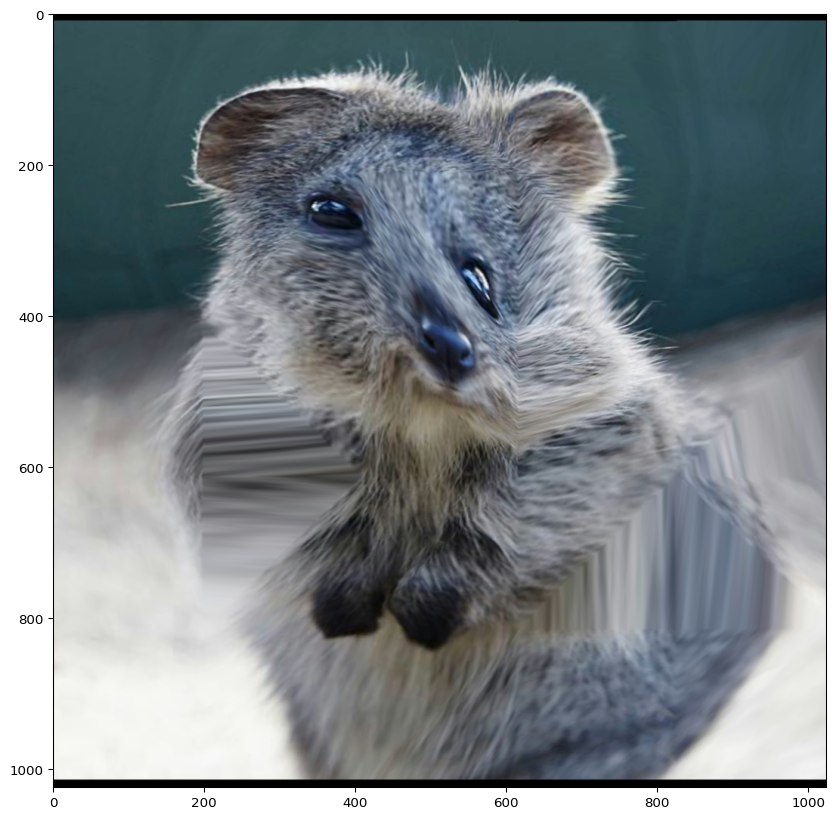

In [24]:
time_start = time.time()
batches_aug = list(aug.augment_batches(batches, background=False))  # list() converts generator to list
time_end = time.time()

print("Augmentation done in %.2fs" % (time_end - time_start,))
ia.imshow(batches_aug[0].images_aug[0])

Elapsed for generate new data: 1911.14 ms


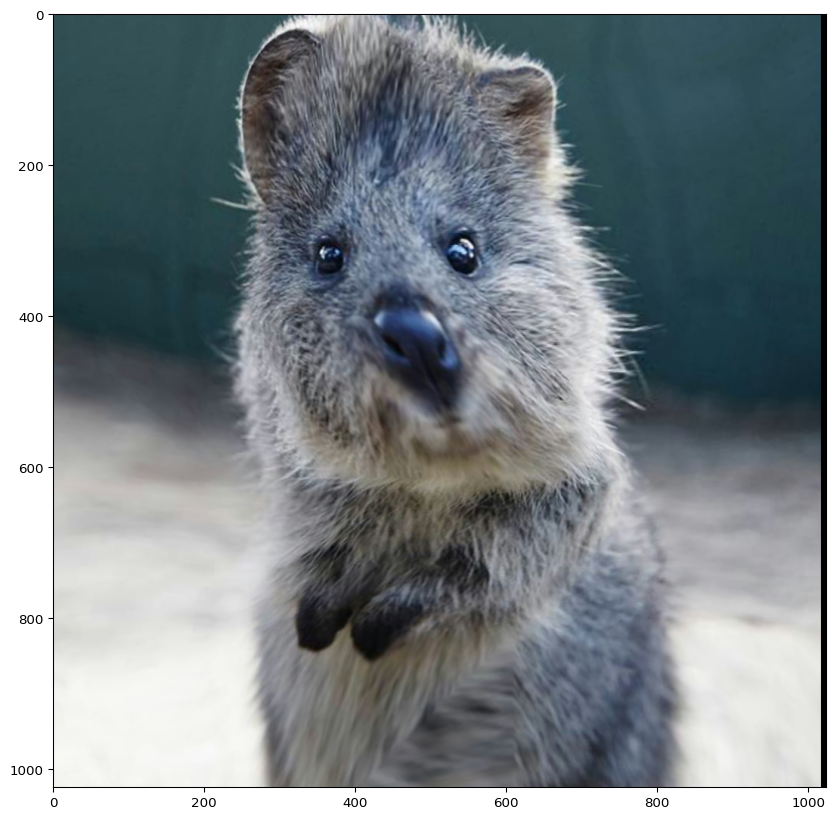

In [25]:
from imgaug import multicore

tic = time.perf_counter()
with multicore.Pool(aug, processes=-1, maxtasksperchild=20, seed=1) as pool:
    batches_aug = pool.map_batches(batches)
toc = time.perf_counter()

print(f"Elapsed for generate new data: {(toc - tic)*1000:0.2f} ms")

ia.imshow(batches_aug[0].images_aug[0])

Elapsed for generate new data: 723.64 ms


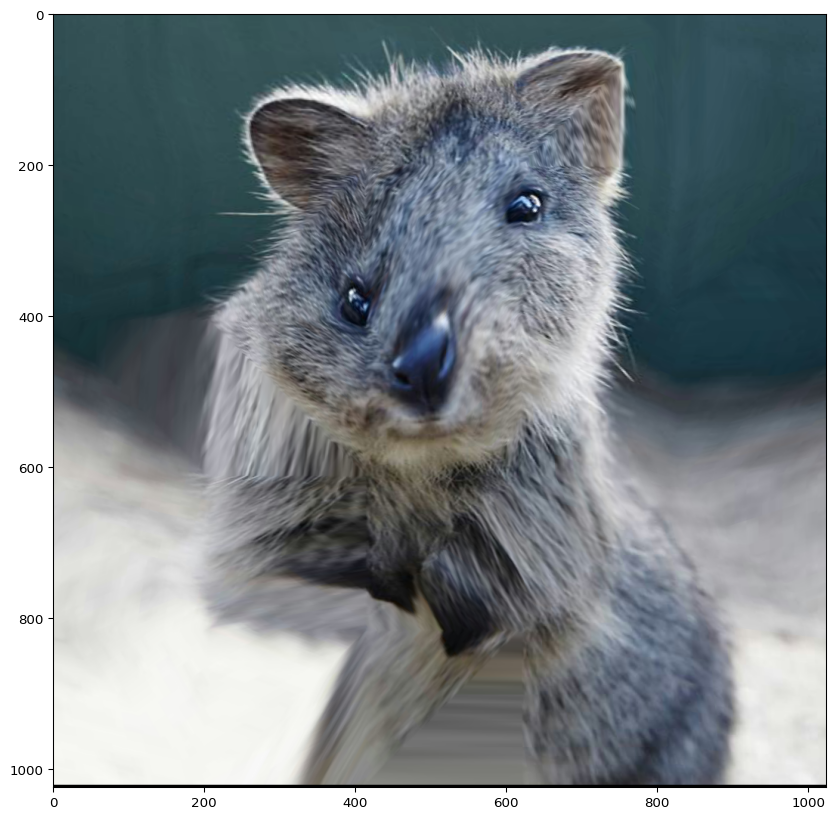

In [8]:
tic = time.perf_counter()
image_augmented = aug.augment_image(image)
toc = time.perf_counter()

print(f"Elapsed for generate new data: {(toc - tic)*1000:0.2f} ms")
ia.imshow(image_augmented)

16
Elapsed for generate new data: 11373.09 ms


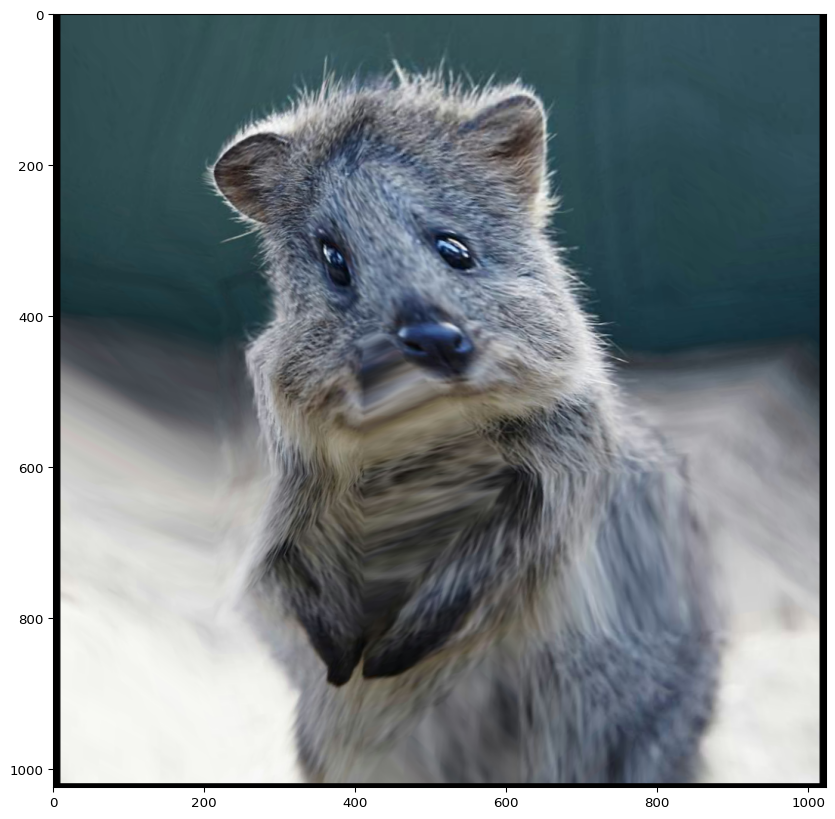

In [9]:
tic = time.perf_counter()
images_augmented = aug.augment_images(images)
toc = time.perf_counter()

print(len(images))
print(f"Elapsed for generate new data: {(toc - tic)*1000:0.2f} ms")
ia.imshow(images_augmented[0])

In [ ]:
time_start = time.time()
batches_aug = list(aug.augment_batches(batches, background=True))  # background=True for multicore aug
time_end = time.time()

print("Augmentation done in %.2fs" % (time_end - time_start,))
ia.imshow(batches_aug[0].images_aug[0])